In [1]:
pip install openpyxl 

     |████████████████████████████████| 243 kB 415 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=734d11c27054473a1d3f592f5e2cb35693cca5ce5c9ffe05c2250dd82872aafd
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install impyute

Note: you may need to restart the kernel to use updated packages.


### Libraries

In [3]:
import pandas as pd
import missingno as msno
from impyute.imputation.cs import mice
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [4]:
df = pd.read_excel('../input/lung-cancer-proyecto-iii/Base_inmunosenescencia_v9.xlsx', sheet_name = 'Data')
df = df.iloc[:131,]
df = df.drop(['Fecha_nac', 'Fecha_dx', 'Leuc%', 'Linf%'], axis = 1)
#df = pd.concat([pd.get_dummies(df['Histologia']), df], axis = 1)
variables = pd.read_excel('../input/lung-cancer-proyecto-iii/Base_inmunosenescencia_v9.xlsx', sheet_name = 'Variables')
variables = variables.iloc[:195]

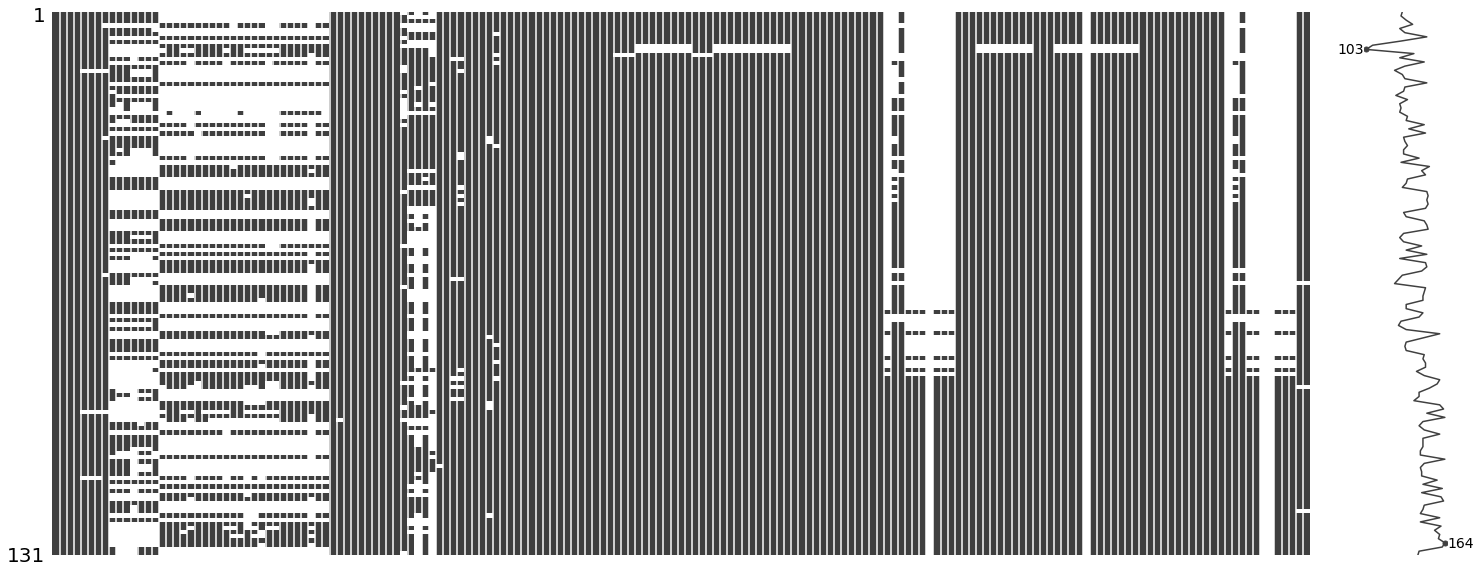

In [5]:
msno.matrix(df)
plt.show()

In [6]:
vbles_a_imputar = ['Sexo', 'Edad_dx', 'ECOG', 'Peso','Talla','IMC','PC_perd_peso', 'Estudios','Est_civil','Hab_tabaq','Exp_tab',
 'Diabetes','Cardiop','Enf_neurod','Histologia', 'T','N','M','Estadio','PD-L1','Estado_mut','Tipo_mut_Tej','Biopsia_liq',
 'Tipo_mut_Liq','Estatinas','Col_total', 'Col_HDL', 'Col_LDL', 'LDH', 'Prot_tot', 'Albumina', 'PCR', 'IL-6','Hb', 'Leucoc_tot',
    "Neutrofilos", "Linf_tot", "Plaquetas", "LinfT_cel", "CD4_cel", "CD8_cel", "CD4:CD8", "LinfB_cel", "LinfNK_cel", 
  "HLADR+Lin_C_Leuc", "mDC_C_Leuc", "pDC_C_Leuc", "CD4_Central_Mem_C_Linf", "CD4_Effector_Mem_C_Linf", "CD4_Naïve_C_Linf", "CD4_TEMRA_C_Linf", 
  "CD8_Central_Mem_C_Linf", "CD8_Effector_Mem_C_Linf", "CD8_Naïve_C_Linf", "CD8_TEMRA_C_Linf", "mDC_CD16_C_mDC", "mDC_CD1c_C_mDC", 
  "mDC_Clec9A_C_mDC", "CD27-CD57+CD3+_C_Linf", "CD27-CD57+CD4+_C_CD3", "CD27-CD57+CD8+_C_CD3", "CD45RA+CCR7+CD3+_C_Linf", "CD8+_term_efect_C_CD3", 
  "CD8_exhausted_C_CD3", "CD4_TCR_ab+_C_CD3", "CD4+_C_Linf", "CD8+_TCR_ab+_C_CD3", "CD8+_C_Linf", "CD8+CD4+_C_Linf", "CD8-CD4-_C_Linf", "HLADR+CD3+_C_Linf", 
  "TCR_ab+_C_Linf", "TCR_gd+_C_Linf", "gd_VD1+_C_CD3", "gd_VD1+VD2+_C_CD3", "gd_VD1-VD2-_C_CD3", "gd_VD2+_C_CD3", "CD25+CD4+_C_Linf",
  'LinfT_%','CD4_%', 'CD8_%','LinfB_%', 'LinfNK_%', 'HLADR+Lin_%Leuc', 'mDC_%Leuc', 'pDC_%Leuc','CD4_Central_Mem_%Linf','CD4_Effector_Mem_%Linf',
  'CD4_Naïve_%Linf', 'CD4_TEMRA_%Linf', 'CD8_Central_Mem_%Linf', 'CD8_Effector_Mem_%Linf', 'CD8_Naïve_%Linf', 'CD8_TEMRA_%Linf', 'mDC_CD16_%mDC',
  'mDC_CD1c_%mDC', 'mDC_Clec9A_%mDC', 'CD3+_%Linf', 'CD27-CD57+CD3+_%Linf', 'CD27-CD57+CD4+_%CD3', 'CD27-CD57+CD8+_%CD3', 'CD3_%Leuc', 'CD3+CD4+_%Linf',
  'CD3+CD57+_%Linf', 'CD3+CD8+_%Linf', 'CD45RA+CCR7+CD3+_%Linf', 'CD8+_term_efect_%CD3', 'CD8_exhausted_%CD3', 'CD4_TCR_ab+_%CD3', 'CD4+_%Linf',
  'CD8+_TCR_ab+_%CD3', 'CD8+_%Linf','CD8+CD4+_%Linf', 'CD8-CD4-_%Linf', 'HLADR+CD3+_%Linf', 'TCR_ab+_%Linf','TCR_gd+_%Linf',
  'gd_VD1+_%CD3', 'gd_VD1+VD2+_%CD3', 'gd_VD1-VD2-_%CD3', 'gd_VD2+_%CD3', 'CD127-/lowFoxP3+_%CD4', 'CD25+CD127low_%Linf', 'CD25+CD4+_%Linf',
  'CD25+FoxP3+_%Linf', 'CD39+FoxP3+_%CD4', 'CD4+_%CD45', 'CD45RA+_%Linf', 'CD45RA+FoxP3+_%CD4', 'Helios+FoxP3+_%CD4']

### Encode categorical variables

In [7]:
cat_vbles = [i for i, v in dict(df.dtypes).items() if v != np.float]
cat_vbles

['SPPB',
 'Tipo_Sd_geriatr',
 'Histologia',
 'T',
 'N',
 'M',
 'Estadio',
 'Estado_mut',
 'Tipo_mut_Tej',
 'Biopsia_liq',
 'Tipo_mut_Liq',
 'Estatinas']

In [8]:
df['Tipo_Sd_geriatr'] = df['Tipo_Sd_geriatr'].astype(str)
df['SPPB'] = df['SPPB'].astype(str)
df['Histologia'] = df['Histologia'].astype(str)
df['T'] = df['T'].astype(str)
df['N'] = df['N'].astype(str)
df['M'] = df['M'].astype(str)
df['Estado_mut'] = df['Estado_mut'].astype(str)
df['Tipo_mut_Tej'] = df['Tipo_mut_Tej'].astype(str)
df['Biopsia_liq'] = df['Biopsia_liq'].astype(str)
df['Tipo_mut_Liq'] = df['Tipo_mut_Liq'].astype(str)
df['Estatinas'] = df['Estatinas'].astype(str)

In [9]:
#This function will encode non-null data and replace it in the original data
def ordinalencode(data):
    encoder = OrdinalEncoder()
    nonulls = np.array(data.dropna())
    impute_reshape = nonulls.reshape(-1,1)
    impute_ordinal = encoder.fit_transform(impute_reshape)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data, encoder
#encoding all the categorical data in the data set through looping
dic_encoders = {}
for column in cat_vbles:
    print('[INFO] {}'.format(column))
    _, enc = ordinalencode(df[column])
    dic_encoders[column] = enc

[INFO] SPPB
[INFO] Tipo_Sd_geriatr
[INFO] Histologia
[INFO] T
[INFO] N
[INFO] M
[INFO] Estadio
[INFO] Estado_mut
[INFO] Tipo_mut_Tej
[INFO] Biopsia_liq
[INFO] Tipo_mut_Liq
[INFO] Estatinas


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

### Imputation

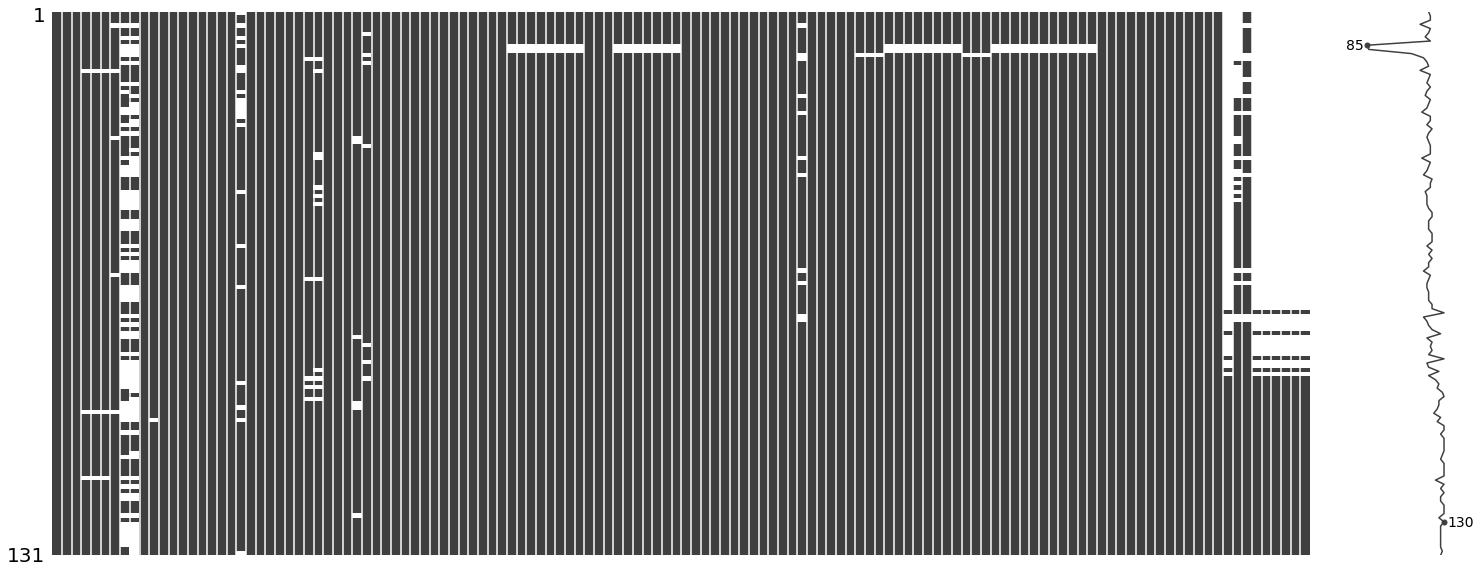

In [10]:
df_a_imp = df[vbles_a_imputar]
msno.matrix(df_a_imp)
plt.show()

In [11]:
imputed_data = mice(df_a_imp.values)
imputed_data_df = pd.DataFrame(imputed_data, columns = df_a_imp.columns)
imputed_data_df = imputed_data_df[df_a_imp.columns]

In [12]:
for n_vble, enc in dic_encoders.items():
    if n_vble in vbles_a_imputar:
        imputed_data_df[n_vble] = np.squeeze(enc.inverse_transform(imputed_data_df[n_vble].values.reshape(-1,1)))

In [13]:
imputed_data_df.head(10)

,Sexo,Edad_dx,ECOG,Peso,Talla,IMC,PC_perd_peso,Estudios,Est_civil,Hab_tabaq,...,gd_VD2+_%CD3,CD127-/lowFoxP3+_%CD4,CD25+CD127low_%Linf,CD25+CD4+_%Linf,CD25+FoxP3+_%Linf,CD39+FoxP3+_%CD4,CD4+_%CD45,CD45RA+_%Linf,CD45RA+FoxP3+_%CD4,Helios+FoxP3+_%CD4
0,2.0,55.0,3.0,64.5,1.80,19.907407,0.072000,1.000000,3.000000,2.0,...,0.17,2.588886,0.414137,3.580000,-0.076582,-1.213685,5.849445,1.785938,-1.089706,-3.749239
1,2.0,58.0,1.0,48.0,1.67,17.211087,0.078000,2.000000,2.000000,1.0,...,1.69,20.323663,1.621208,3.690000,3.441297,9.868785,7.822184,9.258479,-0.686959,11.648087
2,2.0,65.0,1.0,83.0,1.78,26.196187,0.107500,1.000000,2.000000,2.0,...,2.66,18.683848,2.440422,5.250000,4.819887,5.107476,1.787181,3.537766,0.088008,13.475162
3,2.0,76.0,2.0,66.5,1.65,24.426079,-0.177293,3.834041,3.788140,2.0,...,0.61,9.144223,3.770220,2.346222,3.810685,9.830944,-1.616595,-4.418223,1.718386,15.319783
4,2.0,64.0,0.0,80.0,1.65,29.384757,0.000000,1.000000,2.000000,2.0,...,0.54,12.441581,5.401394,5.840000,4.316325,0.595881,7.797560,0.522010,-0.879002,4.997327
5,2.0,58.0,2.0,105.0,1.70,36.332180,0.020000,1.000000,3.000000,1.0,...,0.10,4.660192,4.839239,3.980000,2.182529,-13.557845,3.084352,2.305049,-5.613943,-9.515233
6,1.0,73.0,0.0,59.0,1.59,23.337684,0.064000,-0.752808,3.050648,1.0,...,0.33,-4.662250,0.247128,2.810000,-3.843874,-8.108105,-0.180208,9.105723,-1.306903,-9.223655
7,2.0,59.0,1.0,56.0,1.67,20.079601,0.150000,3.000000,1.000000,1.0,...,0.86,10.157078,4.427662,3.120000,1.031818,4.752963,-1.930960,-9.811397,0.532752,7.436261
8,2.0,83.0,1.0,87.0,1.72,29.407788,0.109000,-4.921477,8.452799,2.0,...,0.14,21.617550,3.891291,1.940000,2.040533,-30.233865,10.241093,12.893896,-1.263985,-18.257117
9,1.0,85.0,1.0,67.5,1.41,33.952014,0.000000,0.132179,14.684869,0.0,...,0.15,11.041586,2.557093,3.560000,1.343624,-12.547426,10.026444,25.525689,-1.108208,-8.476910


In [14]:
pip install xlwt

     |████████████████████████████████| 99 kB 364 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [15]:
imputed_data_df = pd.concat([df['Num_pac'], imputed_data_df], axis = 1)
imputed_data_df.to_excel('cleaned_data.xls')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


In [16]:
df_test = pd.read_excel('../input/lung-cancer-proyecto-iii/Base.inmunosenescencia.v3.xlsx', sheet_name = 'Data')

In [17]:
for i, v in enumerate(df_test.columns[57:]):
    print(i, v)

0 Col_total
1 Col_HDL
2 Col_LDL
3 LDH
4 Prot_tot
5 Albumina
6 PCR
7 IL-6
8 Hb
9 Leucoc_tot
10 Neutrofilos
11 Linf_tot
12 Plaquetas
13 LinfT_cel
14 LinfT_%
15 CD4_cel
16 CD4_%
17 CD8_cel
18 CD8_%
19 CD4:CD8
20 LinfB_cel
21 LinfB_%
22 LinfNK_cel
23 LinfNK_%
24 HLADR+Lin_%Leuc
25 mDC_%Leuc
26 pDC_%Leuc
27 CD4_Central_Mem_%Linf
28 CD4_Effector_Mem_%Linf
29 CD4_Naïve_%Linf
30 CD4_TEMRA_%Linf
31 CD8_Central_Mem_%Linf
32 CD8_Effector_Mem_%Linf
33 CD8_Naïve_%Linf
34 CD8_TEMRA_%Linf
35 mDC_CD16_%mDC
36 mDC_CD1c_%mDC
37 mDC_Clec9A_%mDC
38 CD3+_%Linf
39 CD27-CD57+CD3+_%Linf
40 CD27-CD57+CD4+_%CD3
41 CD27-CD57+CD8+_%CD3
42 CD3_%Leuc
43 CD3+CD4+_%Linf
44 CD3+CD57+_%Linf
45 CD3+CD8+_%Linf
46 CD45RA+CCR7+CD3+_%Linf
47 CD8+_term_efect_%CD3
48 CD8_exhausted_%CD3
49 CD4_TCR_ab+_%CD3
50 CD4+_%Linf
51 CD8+_TCR_ab+_%CD3
52 CD8+_%Linf
53 CD8+CD4+_%Linf
54 CD8-CD4-_%Linf
55 HLADR+CD3+_%Linf
56 Leuc%
57 Linf%
58 TCR_ab+_%Linf
59 TCR_gd+_%Linf
60 gd_VD1+_%CD3
61 gd_VD1+VD2+_%CD3
62 gd_VD1-VD2-_%CD3
63 gd_VD2+_

In [18]:
for j, v in enumerate(imputed_data_df.columns[70:]):
    print(j, v)

0 CD8-CD4-_C_Linf
1 HLADR+CD3+_C_Linf
2 TCR_ab+_C_Linf
3 TCR_gd+_C_Linf
4 gd_VD1+_C_CD3
5 gd_VD1+VD2+_C_CD3
6 gd_VD1-VD2-_C_CD3
7 gd_VD2+_C_CD3
8 CD25+CD4+_C_Linf
9 LinfT_%
10 CD4_%
11 CD8_%
12 LinfB_%
13 LinfNK_%
14 HLADR+Lin_%Leuc
15 mDC_%Leuc
16 pDC_%Leuc
17 CD4_Central_Mem_%Linf
18 CD4_Effector_Mem_%Linf
19 CD4_Naïve_%Linf
20 CD4_TEMRA_%Linf
21 CD8_Central_Mem_%Linf
22 CD8_Effector_Mem_%Linf
23 CD8_Naïve_%Linf
24 CD8_TEMRA_%Linf
25 mDC_CD16_%mDC
26 mDC_CD1c_%mDC
27 mDC_Clec9A_%mDC
28 CD3+_%Linf
29 CD27-CD57+CD3+_%Linf
30 CD27-CD57+CD4+_%CD3
31 CD27-CD57+CD8+_%CD3
32 CD3_%Leuc
33 CD3+CD4+_%Linf
34 CD3+CD57+_%Linf
35 CD3+CD8+_%Linf
36 CD45RA+CCR7+CD3+_%Linf
37 CD8+_term_efect_%CD3
38 CD8_exhausted_%CD3
39 CD4_TCR_ab+_%CD3
40 CD4+_%Linf
41 CD8+_TCR_ab+_%CD3
42 CD8+_%Linf
43 CD8+CD4+_%Linf
44 CD8-CD4-_%Linf
45 HLADR+CD3+_%Linf
46 TCR_ab+_%Linf
47 TCR_gd+_%Linf
48 gd_VD1+_%CD3
49 gd_VD1+VD2+_%CD3
50 gd_VD1-VD2-_%CD3
51 gd_VD2+_%CD3
52 CD127-/lowFoxP3+_%CD4
53 CD25+CD127low_%Linf
54 CD25